In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates

import xarray as xr
import cartopy.crs as ccrs
psd = xr.load_dataset('../../data/Processed/psd_wave.nc')


Text(0.5, 1.0, '$f_p (Hz)$')

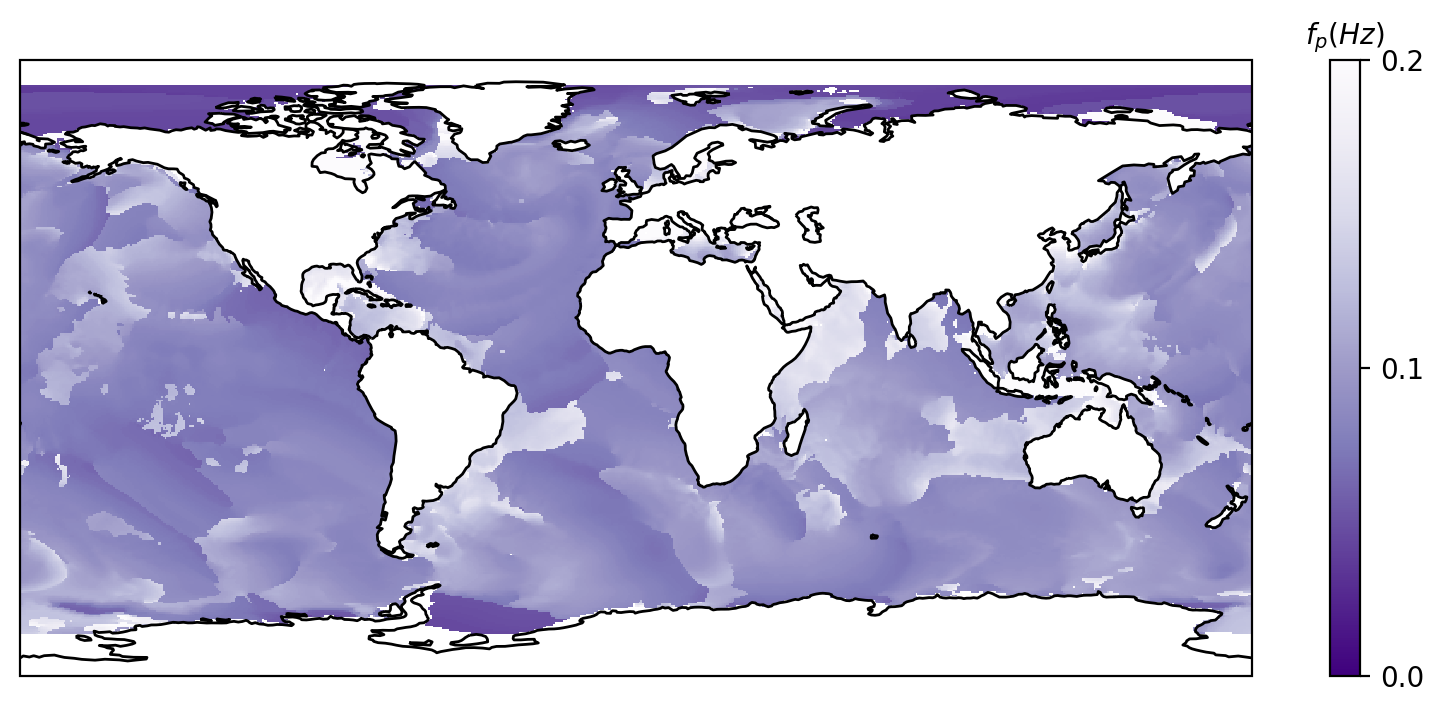

In [68]:
fig = plt.figure(figsize=(10, 4),dpi=200)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines()

basepath = basepath = '/Users/jwu/Work/Dabble/Waves/'
file = basepath + 'data/LOPS_WW3-GLOB-30M_202201.nc'
ds = xr.open_dataset(file,chunks={'time':'500MB'})
lons = ds.longitude.values
lats = ds.latitude.values

# ''' Direction '''
# c = ax.pcolormesh(lons, lats, ds.isel(time=0).dir, vmax=360, vmin=0, transform=ccrs.PlateCarree(), cmap='twilight') # cyclic cmap
# clb = plt.colorbar(c, ax=ax, ticks=[0,90,180,270,360])
# clb.ax.set_title(r'$\theta (\degree)$',fontsize=10)

# ''' Wave height '''
# c = ax.pcolormesh(lons, lats, ds.isel(time=0).hs, vmax=10, vmin=0, transform=ccrs.PlateCarree(), cmap='Blues') # cyclic cmap
# clb = plt.colorbar(c, ax=ax, ticks=[0,2,4,6,8,10])
# clb.ax.set_title(r'$H_s (m)$',fontsize=10)

''' Wavepeak frequency '''
c = ax.pcolormesh(lons, lats, ds.isel(time=0).fp, vmax=0.2, vmin=0, transform=ccrs.PlateCarree(), cmap='Purples_r') # cyclic cmap
clb = plt.colorbar(c, ax=ax, ticks=[0,0.1,0.2])
clb.ax.set_title(r'$f_p (Hz)$',fontsize=10)

# ''' Add the cruises '''
# pcodes = {'77':'Metz', '69':'Epic', '87':'WHOTS', '83':'STRATUS',
#           '78':'NEAQS', '72':'HiWInGS', '71':'GasEx', '68':'DYNAMO', '67':'Calwater', '73':'Capricorn'}
# colors = cm.tab10(np.linspace(0, 1, 10))
# for i, p in enumerate(np.unique(psd.pcode.dropna(dim='time'))):
#     idx = psd.pcode == p
#     pcode = pcodes[str(int(p))]
#     cs = ax.scatter(psd.lon[idx], psd.lat[idx],
#                     s=2, color=colors[i], label='{}'.format(pcode), transform=ccrs.PlateCarree())
    
# leg = plt.legend(bbox_to_anchor=(1.05, 0.2), loc=3, fontsize=10)
# for handle in leg.legendHandles:
#     handle.set_sizes([20])

In [17]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 323, time: 248)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude   (latitude) float32 -78.0 -77.5 -77.0 -76.5 ... 82.0 82.5 83.0
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-31T21:00:00
Data variables: (12/86)
    MAPSTA     (latitude, longitude) int16 dask.array<chunksize=(323, 720), meta=np.ndarray>
    dpt        (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    ucur       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    vcur       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    uwnd       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    vwnd       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    ...         ...
    vabr       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    uubr       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    vubr       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    mssu       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    mssc       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
    mssd       (time, latitude, longitude) float32 dask.array<chunksize=(248, 323, 720), meta=np.ndarray>
Attributes: (12/102)
    WAVEWATCH_III_version_number:     7.00
    WAVEWATCH_III_switches:           F90 NOGRB NC4 SCRIP SCRIPNC SHRD PR3 UQ...
    SIN4 namelist parameter BETAMAX:  1.75
    title:                            WAVEWATCH-III HINDCAST
    netcdf_version:                   4.5.2
    product_name:                     LOPS_WW3-GLOB-30M_202201.nc
    ...                               ...
    P2SF:                             1
    E3D:                              1
    I1P2SF:                           3
    I2P2SF:                           24
    start_date:                       2022-01-01 00:00:00
    stop_date:                        2022-01-31 21:00:00

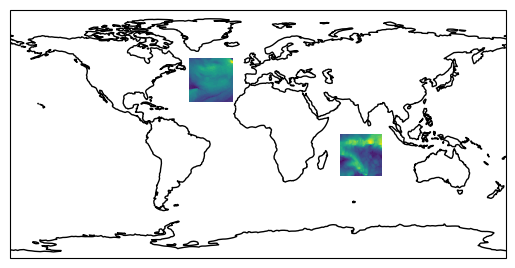

In [7]:
''' Figuring out which regions to sample '''
YR = 2022
basepath = basepath = '/Users/jwu/Work/Dabble/Waves/'
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g01.nc' %YR
ds = xr.open_dataset(file,chunks={'time':'500MB'})

ax = plt.axes(projection=ccrs.PlateCarree())

ds_sub = ds.sel(longitude=slice(60,90),latitude=slice(-30,0))
Uwnd = ds_sub.uwnd.values
lon = ds_sub.longitude.values
lat = ds_sub.latitude.values
plt.contourf(lon, lat, Uwnd[1], 60, transform=ccrs.PlateCarree())

# ds_sub = ds.sel(longitude=slice(-150,-120),latitude=slice(-30,0))
# Uwnd = ds_sub.uwnd.values
# lon = ds_sub.longitude.values
# lat = ds_sub.latitude.values
# plt.contourf(lon, lat, Uwnd[1], 60, transform=ccrs.PlateCarree())

# [-45,-13.5,28.5,60]
ds_sub = ds.sel(longitude=slice(-50,-18.5),latitude=slice(23.5,55))
Uwnd = ds_sub.uwnd.values
lon = ds_sub.longitude.values
lat = ds_sub.latitude.values
plt.contourf(lon, lat, Uwnd[1], 60, transform=ccrs.PlateCarree())

ax.coastlines()
ax.set_global()

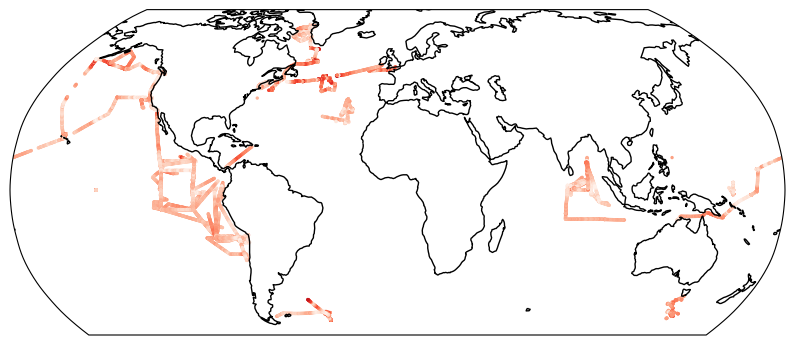

In [42]:
# I wanted to make a plot that shows trajectory in space time and color coded by the quantity of interest
pcodes = {'77':'Metz', '69':'Epic', '87':'WHOTS', '83':'STRATUS',
          '78':'NEAQS', '72':'HiWInGS', '71':'GasEx', '68':'DYNAMO', '67':'Calwater', '73':'Capricorn'}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
# ax.set_global()
ax.coastlines()
colors = cm.tab10(np.linspace(0, 1, 10))

U_ = ds.U.values[~np.isnan(ds.U.values)]
U_.max()

for i, p in enumerate(np.unique(ds.pcode.dropna(dim='time'))):
    idx = ds.pcode == p
    pcode = pcodes[str(int(p))]
    cs = ax.scatter(ds.lon[idx], ds.lat[idx],
                    s=2, color=plt.get_cmap('Reds')(ds.U[idx]/U_.max()), transform=ccrs.PlateCarree())


['2011-09-03T00:24:59.904000000' '2011-09-03T01:30:00.000000000'
 '2011-09-03T02:30:00.115200000' ... '2011-12-31T21:24:59.904000000'
 '2011-12-31T22:30:00.000000000' '2011-12-31T23:30:00.115200000']


/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


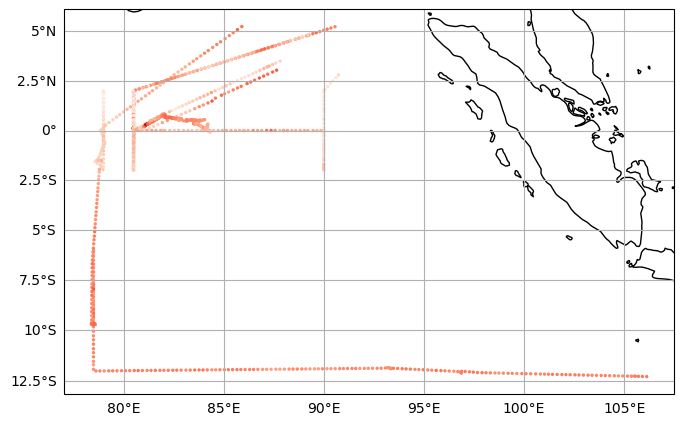

In [138]:
# I wanted to make a plot that shows trajectory in space time and color coded by the quantity of interest
pcodes = {'77':'Metz', '69':'Epic', '87':'WHOTS', '83':'STRATUS',
          '78':'NEAQS', '72':'HiWInGS', '71':'GasEx', '68':'DYNAMO', '67':'Calwater', '73':'Capricorn'}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# ax.set_global()
ax.coastlines()
colors = cm.tab10(np.linspace(0, 1, 10))

idx = ds.pcode == 68
U_ = ds.U.values[idx]
U_ = U_[~np.isnan(U_)]
pcode = pcodes[str(int(p))]
cs = ax.scatter(ds.lon[idx], ds.lat[idx],
                s=2, color=plt.get_cmap('Reds')(ds.U[idx]/U_.max()), transform=ccrs.PlateCarree())
print(ds.time.values[idx])
gl = ax.gridlines()
gl.xlabels_bottom = True
gl.ylabels_left = True